In [2]:
import numpy as np
from matplotlib import pyplot as plt

<h1 align="center">Volume 4: Timber Harvest.</h1>

    NAME Daniel Smith
    Section #2
    DATE 30 March 2022

# Problem 1

Write a function that takes as input scalars $x_{0}$, $k$, $r$, and a final time $T$ and solves the optimal control problem stated above using the RK4 method described above. The function will return the time-step and the values of x and u at the specific time-steps.

In [42]:
def RK4(x0, k, r, T, x, alpha, u, N = 1000, delta = 0.001):
    """
    Returns x and u using RK4 to solve.
    """
    t = np.linspace(0, T, N + 1) # Intialize t and h
    h = T/N
    h2 = h/2
    x[0] = x0

    for i in range(N):
        # Update x 
        k1 = k*u[i]*x[i]
        k2 = k*1/2*(u[i] + u[i + 1])*(x[i] + h2*k1)
        k3 = k*1/2*(u[i] + u[i + 1])*(x[i] + h2*k2)
        k4 = k*u[i + 1]*(x[i] + h*k3)
        x[i + 1] = x[i] + h/6*(k1 + 2*k2 + 2*k3 + k4)

        # Update alpha 
        k1 = u[N - i]*(np.exp(-r*t[N - i]) - k*alpha[N - i]) - np.exp(-r*t[N - i])
        k2 = u[N - i]*(np.exp(-r*(t[N - i] - h2)) - k*(alpha[N - i] - h2*k1)) - np.exp(-r*(t[N - i] - h2))
        k3 = u[N - i]*(np.exp(-r*(t[N - i] - h2)) - k*(alpha[N - i] - h2*k2)) - np.exp(-r*(t[N - i] - h2))
        k4 = u[N - i]*(np.exp(-r*(t[N - i] - h)) - k*(alpha[N - i] - h*k3)) - np.exp(-r*(t[N - i] - h))
        alpha[N - i - 1] = alpha[N - i] - 1/6 * h * (k1 + 2*k2 + 2*k3 + k4)

    # Compute u
    u = np.clip(np.sign(x*(k*alpha - np.exp(-r*t))), 0, 1)

    return x, u
        
def prob1(x0, k, r, T):
    N = 1000 # Initialize values 
    x = np.zeros(N + 1)
    alpha = np.zeros(N + 1)
    u = np.zeros(N + 1)
    delta = 0.001
    
    test = -1
    while test <= 0: # Iterate until test is positive 
        oldx = x.copy() # Get old values 
        oldalpha = alpha.copy()
        oldu = u.copy()
        
        x, u = RK4(x0, k, r, T, x, alpha, u) # Get new values 

        temp1 = delta*np.sum(np.abs(u)) - np.sum(np.abs(oldu - u))
        temp2 = delta*np.sum(np.abs(x)) - np.sum(np.abs(oldx - x))
        temp3 = delta*np.sum(np.abs(alpha)) - np.sum(np.abs(oldalpha - alpha))
        test = np.min([temp1, np.min([temp2, temp3])]) # Test 

    return x, u

# Problem 2

Using your function from problem 1, plot time vs. timber production ($x$) and plot time vs. reinvestment percentage ($u$) for the following values: $x_{0} = 100$, $k = 1$, $r = 0$, and $T = 5$.


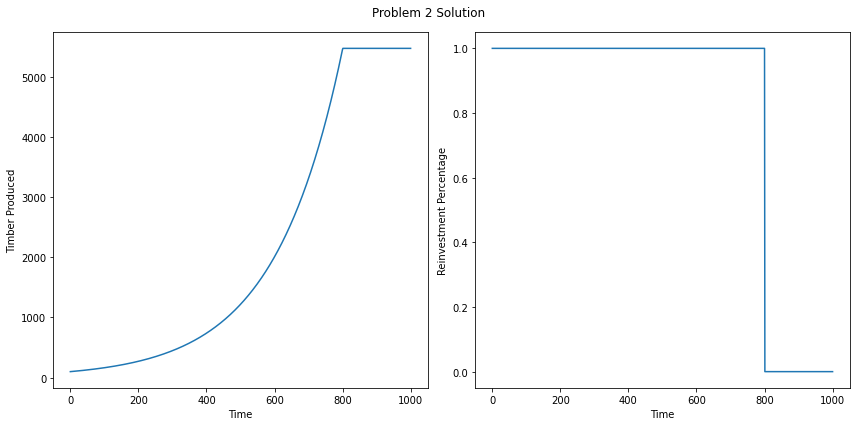

In [46]:
x, u = prob1(100, 1, 0, 5) # Get x and u

fig, ax = plt.subplots(1, 2, figsize = (12, 6)) # Generate plots 
ax[0].plot(x)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Timber Produced")
ax[1].plot(u)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Reinvestment Percentage")
plt.suptitle("Problem 2 Solution")
plt.tight_layout()
plt.show()

# Problem 3

Plot the same graphs that you did in problem 2, but instead for the following values: $x_{0} = 100$, $k = 0.3$, $r = 0.05$, and $T = 5$. At what time does the switching point occur?

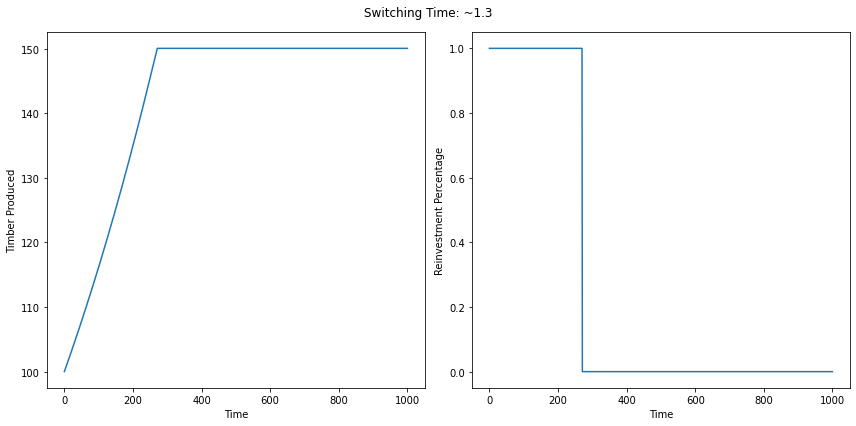

In [48]:
x, u = prob1(100, .3, .05, 5) # Get x and u

fig, ax = plt.subplots(1, 2, figsize = (12, 6)) # Generate plots 
ax[0].plot(x)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Timber Produced")
ax[1].plot(u)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Reinvestment Percentage")
plt.suptitle("Switching Time: ~1.3")
plt.tight_layout()
plt.show()

# Problem 4

Now use the same parameters as in problem 3, but vary the initial value of the timber production capacity ($x_{0}$). You should try a smaller value, a slightly larger value, and fairly larger value for $x_{0}$. What do you notice about the optimal controls (are they the same or are they different)?


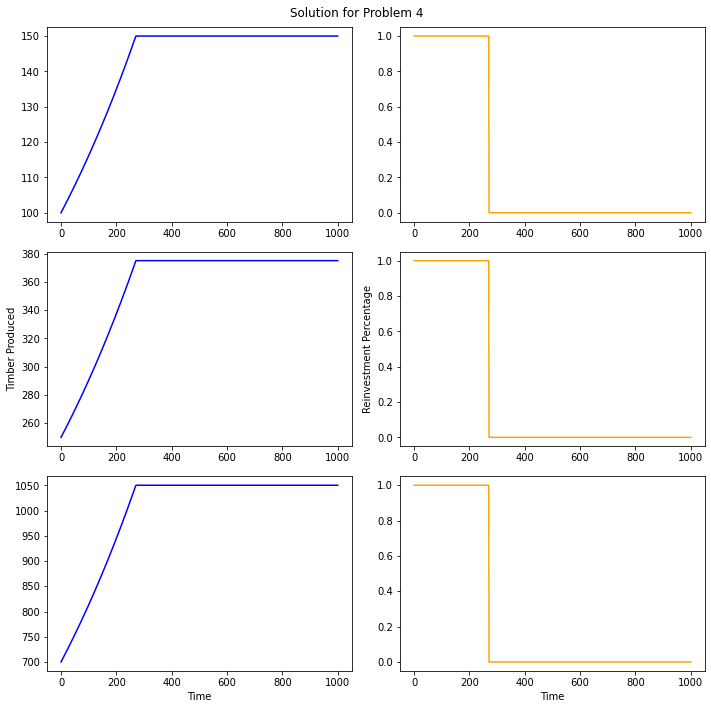

It looks like the optimal controls are the same.


In [59]:
x0s = [100, 250, 700] # Initialize differnet values 

fig, ax = plt.subplots(3, 2, figsize = (10, 10))

for i in range(3): # Generate plots 
    x, u = prob1(x0s[i], .3, .05, 5)
    ax[i, 0].plot(x, color = "blue")
    ax[i, 1].plot(u, color = "orange")

ax[2, 0].set_xlabel("Time") # Update labels 
ax[2, 1].set_xlabel("Time")
ax[1, 0].set_ylabel("Timber Produced")
ax[1, 1].set_ylabel("Reinvestment Percentage")
plt.suptitle("Solution for Problem 4")
plt.tight_layout()
plt.show()

print("It looks like the optimal controls are the same.")